In [213]:
import pandas as pd
import numpy as np
PATH = 'H:\\CrashWeatherData\\DATA INFO\\'
PATH2 = 'H:\\CrashWeatherData\\SCRAPPER\\'

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [214]:
def NaNconverter(x):
    try:
        convert = {'None': 0, None: 0, ' ': 0, 'nan': 0, '00': 0}
        x = convert[str(x)]
    except KeyError:
        return x
    return x

def weekday(x):
    week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    week_end = ['Saturday','Sunday']
    if x in week_days:
        x = 1
    elif x in week_end:
        x = 0
    return x

def lightconvert(x):
    convert = {'Daylight': 1, 'DarkLighted': 2, 'Dusk': 3, 'DarkNot Lighted': 4, ' ' : 0, 'Dawn': 5, '0': 0}
    x = convert[str(x)]
    return x

def surfaceconvert(x):
    convert = {'Dry': 'Dry', 'Wet': 'Wet', ' ': 0, 'Slush': 'Snow', 'Water (standing or moving)': 'Water (standing or moving)', 'Snow': 'Snow', 'Ice/Frost': 'Snow', '0': 0, 'Other': 0}
    x = convert[str(x)]
    return x

def speedconvert(x):
    x = str(x)
    x = x.replace('Â\xa0mph', '')
    
    try:
        x = x.replace('Ã\x82', '')
    except:
        x = float(x)
        return x
    x = float(x)
    return x

def dirconvert(x):
    convert = { None: 0, 'None': 0, ' ': 0, 'ENE': 16, 'South': 1, 'East': 2, 'SW': 3, 'Southwest': 3,
               'West': 4, 'North': 5, 'ESE': 6, 
               'NW': 7, 'Northwest': 7, 'NNW': 8, '0': 0,
               'NE': 9, 'Northeast': 9, 'WSW': 10, 'SSW': 11, 'NNE': 12, 'SE': 13, 'Southeast': 13, 'WNW': 14, 'SSE': 15
              }
    x = convert[str(x)]
    return x

def safe(x):
    try:
        convert = { '0': 0, None: 0, 'None': 0, ' ': 0, 'Unknown': 0, 'Bicycle Helmet': 'Helmet', 'Motorcycle Helmet': 'Helmet', 'Non-Motorist Lighting': 0}
        x = convert[str(x)]
    except KeyError:
        return x
    return x

def Mnvr(x):
    try:
        convert = { '0': 0, None: 0, 'None': 0, ' ': 0, 'Unknown': 0, 'Other': 0, 'PIT': 0 }
        x = convert[str(x)]
    except KeyError:
        return x
    return x

def CarSize(x):

    convert = { '0': 0, None: 0, 'None': 0, ' ': 0, 'Unknown': 0, 'Other': 0, 'Pickup Truck': 'M', 'Passenger Car': 'M',
              'Sports Utility Vehicle (SUV)': 'M', 'Van': 'M', 'Single Unit Truck': 'L', 'Farm or Construction Equip.': 'XL',
              'Vehicle With Trailer': 'XL', 'Motorcycle': 'S', 'Truck Tractor (Bobtail)': 'XL', 'Tractor w/Twin Trailers': 'XL',
              'Panel Truck': 'L', 'Ambulance': 'L', 'Bus': 'L', 'Truck Towing House Trailer': 'XL', 'All Terrain Vehicle': 'S',
              'Motorized Recreational Vehicle': 'S', 'Tractor/Trailer': 'XL', 'Logging Tractor/Trailer': 'XL', 'Logging Truck': 'XL'}
    x = convert[str(x)]
    return x

def Construction(x):

    convert = { '0': 0, 0: 0, 'Construction': 'Construction', 'Maintenance': 'Construction', 'Unknown Type': 0}
    x = convert[str(x)]

    return x

def dirconvert(x):
    convert = { None: 0, 'None': 0, ' ': 0, 'ENE': 16, 'South': 1, 'East': 2, 'SW': 3, 'Southwest': 3,
               'West': 4, 'North': 5, 'ESE': 6, 
               'NW': 7, 'Northwest': 7, 'NNW': 8, '0': 0,
               'NE': 9, 'Northeast': 9, 'WSW': 10, 'SSW': 11, 'NNE': 12, 'SE': 13, 'Southeast': 13, 'WNW': 14, 'SSE': 15
              }
    x = convert[str(x)]
    return x

def rushHR(x):
    if (int(x) >= 700) and (int(x) <= 1000):
        x = 'Rush'
    elif (int(x) >= 1500) and (int(x) <= 2000):
        x = 'Rush'
    else:
        x = 'Not Rush'
    return x

def Zscore(colm_df):
    
    mean = colm_df.mean()
    std = colm_df.std()
    colm_List = colm_df.tolist()
    Z = list(map(lambda x: (x - mean)/std, colm_List))
    return Z

def intersection(x):
    if x == 0:
        pass
    elif x == -1:
        x = 'Within'
    elif x == 2:
        x = 'Diverging'
    elif x == 1:
        x = 'Merging'
    
    return x

def OneHot(NewName, oldName, df, exceptions):
    uniqueL = df[str(oldName)].unique()
    for item in uniqueL:
        if (item in exceptions):
            df[str(NewName) + '_Other'] =  np.where(df[str(oldName)] == str(item), 1, 0)
        else:
            df[str(NewName) + '_' + str(item)] =  np.where(df[str(oldName)] == str(item), 1, 0)
    df = df.drop([str(oldName)], axis = 1)
    return df

In [215]:
df = pd.read_csv(PATH + 'Stations with Cameras\\CrashWweather\\All_Crashes_with_weather.csv', encoding='latin1')

df['Gust'] = df['Gust'].map(speedconvert)
df['CURVA'] = Zscore(df['CURVA'])
df['intersection'] = df['intersection'].map(intersection)
df = OneHot('Interchange', 'intersection', df, ['0',0, 'Other', 'other'])

df = df.applymap(NaNconverter)
df['Speed'] = df['Speed'].map(speedconvert)
df = df.rename(columns = {"Speed":"Wind_Speed"}) 
df['Gust'] = df['Gust'].map(speedconvert)
df['Wind'] = df['Wind'].map(dirconvert)
df['DirectionF'] = df['DirectionF'].map(dirconvert)

df = df[df['RouteType'] != 'State Route']
# --- Ignore these? --- #
df = df.drop(['RouteType', 'RouteTypeD', 'Route', 'IntersectR', 'Intersecti', 'PrivatePro'], axis = 1)

df = df.drop([ 'ObjectId','OBJECTID_1','OBJECTID_2','STATION_ID','TRAVEL_DIR','Join_Cou_1',
              'InterName','BUFF_DIST','Shape_Area','heightpixeltopdown','widthpixelleftright','Date2','Time2',
              'None','Time','ComboID', 'Wind',
              'vehCount','SOURCE_ID','Shape__Len','timeid','camerastatus','FID','AgencyName',
              'DateTime1','County', 'Milelog','DirVeh1','DirVeh2',
              'FirstHarmf', 'DistanceFr', 'DirectionF', 'U2RoadCont', 'Injuries', 'NumberOfVe'], 1)

df = df.drop(['index', 'U2RoadComp', 'U1TrafficC', 'U2TrafficC', 'acc1'], 1)

# --- Human Features Dropped --- #
df = df.drop(['VehType1','VehType2','MnvrVeh1','MnvrVeh1','U2RoadChar','DriverSafe','DriverSa_1','U1Factors',
              'U2Factors', 'MnvrVeh2', 'ComplaintI', 'SeriousInj', 'VisibleInj', 'Fatalities', 'U2WorkZone'], 1)

df = df.drop(['DriverAge1', 'DriverAge2','U1RoadChar','U1RoadCont','LocationOf'], 1)

df = OneHot('RoadComp', 'U1RoadComp', df, ['0',0, 'Other', 'other', 'Tar and Gravel'])

# --- keep weather --- #
weather = ['Dew Point','Humidity','Wind','Gust','Pressure']
# --- new drops --- #
V2drops = ['Pressure']
df = df.drop(V2drops, axis = 1)

# --- Non-Human Features --- #
df = OneHot('Lighting', 'Light', df, ['0',0, 'Other', 'other'])

# -- Surface -- #
# ['Dry', 'Wet', 'Slush', 'Ice/Frost', 'Water (standing or moving)', 'Other', 0, 'Snow']
df['Surface'] = df['Surface'].map(surfaceconvert)
df = OneHot('Surface', 'Surface', df, ['0',0, 'Other', 'other'])

In [216]:
def WorkZone(x):
    convert = {0:0, 'Construction': 1, 'Unknown Type': 1, 'Maintenance': 1}
    x = convert[x]
    return x


df['WorkZone'] = df['U1WorkZone'].map(WorkZone)
df = df.drop(['U1WorkZone'], 1)

In [217]:
# --- ADDING COLUMNS --- #
dfgen = pd.read_csv('H:\\CrashWeatherData\\8month_crashes_with_acceleration.csv', encoding='latin1')

def add_cols(df, dfgen, indexer):
    selected = df['AccidentNo'].tolist()
    keys = dfgen['AccidentNo'].tolist()
    vals = dfgen[indexer].tolist()
    converter = dict(zip(keys, vals))
    recall = list(map(lambda x: converter.get(x), selected))
    df[indexer] = recall
    return df

df = add_cols(df, dfgen, 'count_')
# df = add_cols(df, dfgen, 'NumberOfVe')
df = add_cols(df, dfgen, 'occupancy')
# df = OneHot('Day', 'dayofweek', df, ['0',0, 'Other', 'other'])
df['dayofweek'] = df['dayofweek'].map(weekday)
df = df.rename({'dayofweek':'Weekday'}, axis=1)

df = df.drop(['Temperature','AccidentNo','Dew Point', 'Humidity','Anti1Clock0'], 1)

In [218]:
def mkLabel(x):
    convert = {'Rear End': 1, 'Sideswipe-Same Direction': 2, 'Angle': 3,
               'Not A Collision with Motor Vehicle': 4, 'Head On': 5, 0:0, 'Sideswipe-Opposite Direction': 6, '0': 0}
    x = convert[str(x)]
    return x

df['MannerOfCo'] = df['MannerOfCo'].map(mkLabel)

# --- Drop 0ther MOC --- #
df = df[df['MannerOfCo'] != 5]
df = df[df['MannerOfCo'] != 6]
df = df[df['MannerOfCo'] != 0]

# --- Single Car Crash --- #
# df_single = df[df['MannerOfCo'] == 4]
# df = df[df['MannerOfCo'] != 4]

ColumnNames  = df.columns

newcols = []
for x in ColumnNames:
    
    x = x.replace(",", "")
    x = x.replace("", "")
    x = x.replace(".", "")
    x = x.replace(" ", "_")
    rename = ['speed','occupancy','CURVA','count_','RampSectio','RampSectio','RAD_CURV','Surface_Water_(standing_or_moving)']
    convert = {'Surface_Water_(standing_or_moving)': 'Surface_Water','speed':'Speed', 'occupancy': 'Road_Occupancy', 'CURVA': 'Road_Curvature', 'RAD_CURV': 'Radius_of_Curvature', 'count_': 'Veh_Count', 'RampSectio':'Ramp_Section'}
    if x in rename:
        x = convert[x]
    newcols.append(x)
    

df.columns = newcols

In [219]:
df = df.drop(['camera','Date1','Time1','LatDecimal','LongDecima','Road_Curvature'], 1)

In [220]:
# df = df.drop(['LatDecimal','LongDecima','Radius_of_Curvature'], 1)

In [221]:
df.head()

,Wind_Speed,Gust,Precip_Rate,Precip_Accum,Speed,Road_Occupancy,Weekday,Ramp_Section,MannerOfCo,Radius_of_Curvature,Interchange_Within,Interchange_Other,Interchange_Diverging,Interchange_Merging,RoadComp_Black_Top,RoadComp_Concrete,RoadComp_Other,Lighting_Daylight,Lighting_DarkLighted,Lighting_DarkNot_Lighted,Lighting_Dusk,Lighting_Dawn,Lighting_Other,Surface_Dry,Surface_Wet,Surface_Snow,Surface_Water,Surface_Other,WorkZone,Veh_Count
0,1.0,0.0,0.0,0.00,93.0,14,1,0.0,1,2.568567e+02,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,41
1,8.0,0.0,0.0,1.69,110.0,12,1,0.0,1,6.329002e+02,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,39
2,0.0,0.0,0.0,0.03,53.0,14,1,0.0,1,1.432643e+06,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,41
3,0.0,0.0,0.0,0.03,67.0,14,1,0.0,1,1.430943e+03,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,38
4,0.0,0.0,0.0,0.00,90.0,14,1,0.0,1,1.432643e+06,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,41


Rectangle(xy=(-0.4, 0), width=0.8, height=54.7742, angle=0)
darkorange
Rectangle(xy=(0.6, 0), width=0.8, height=27.4365, angle=0)
dodgerblue
Rectangle(xy=(1.6, 0), width=0.8, height=9.72119, angle=0)
forestgreen


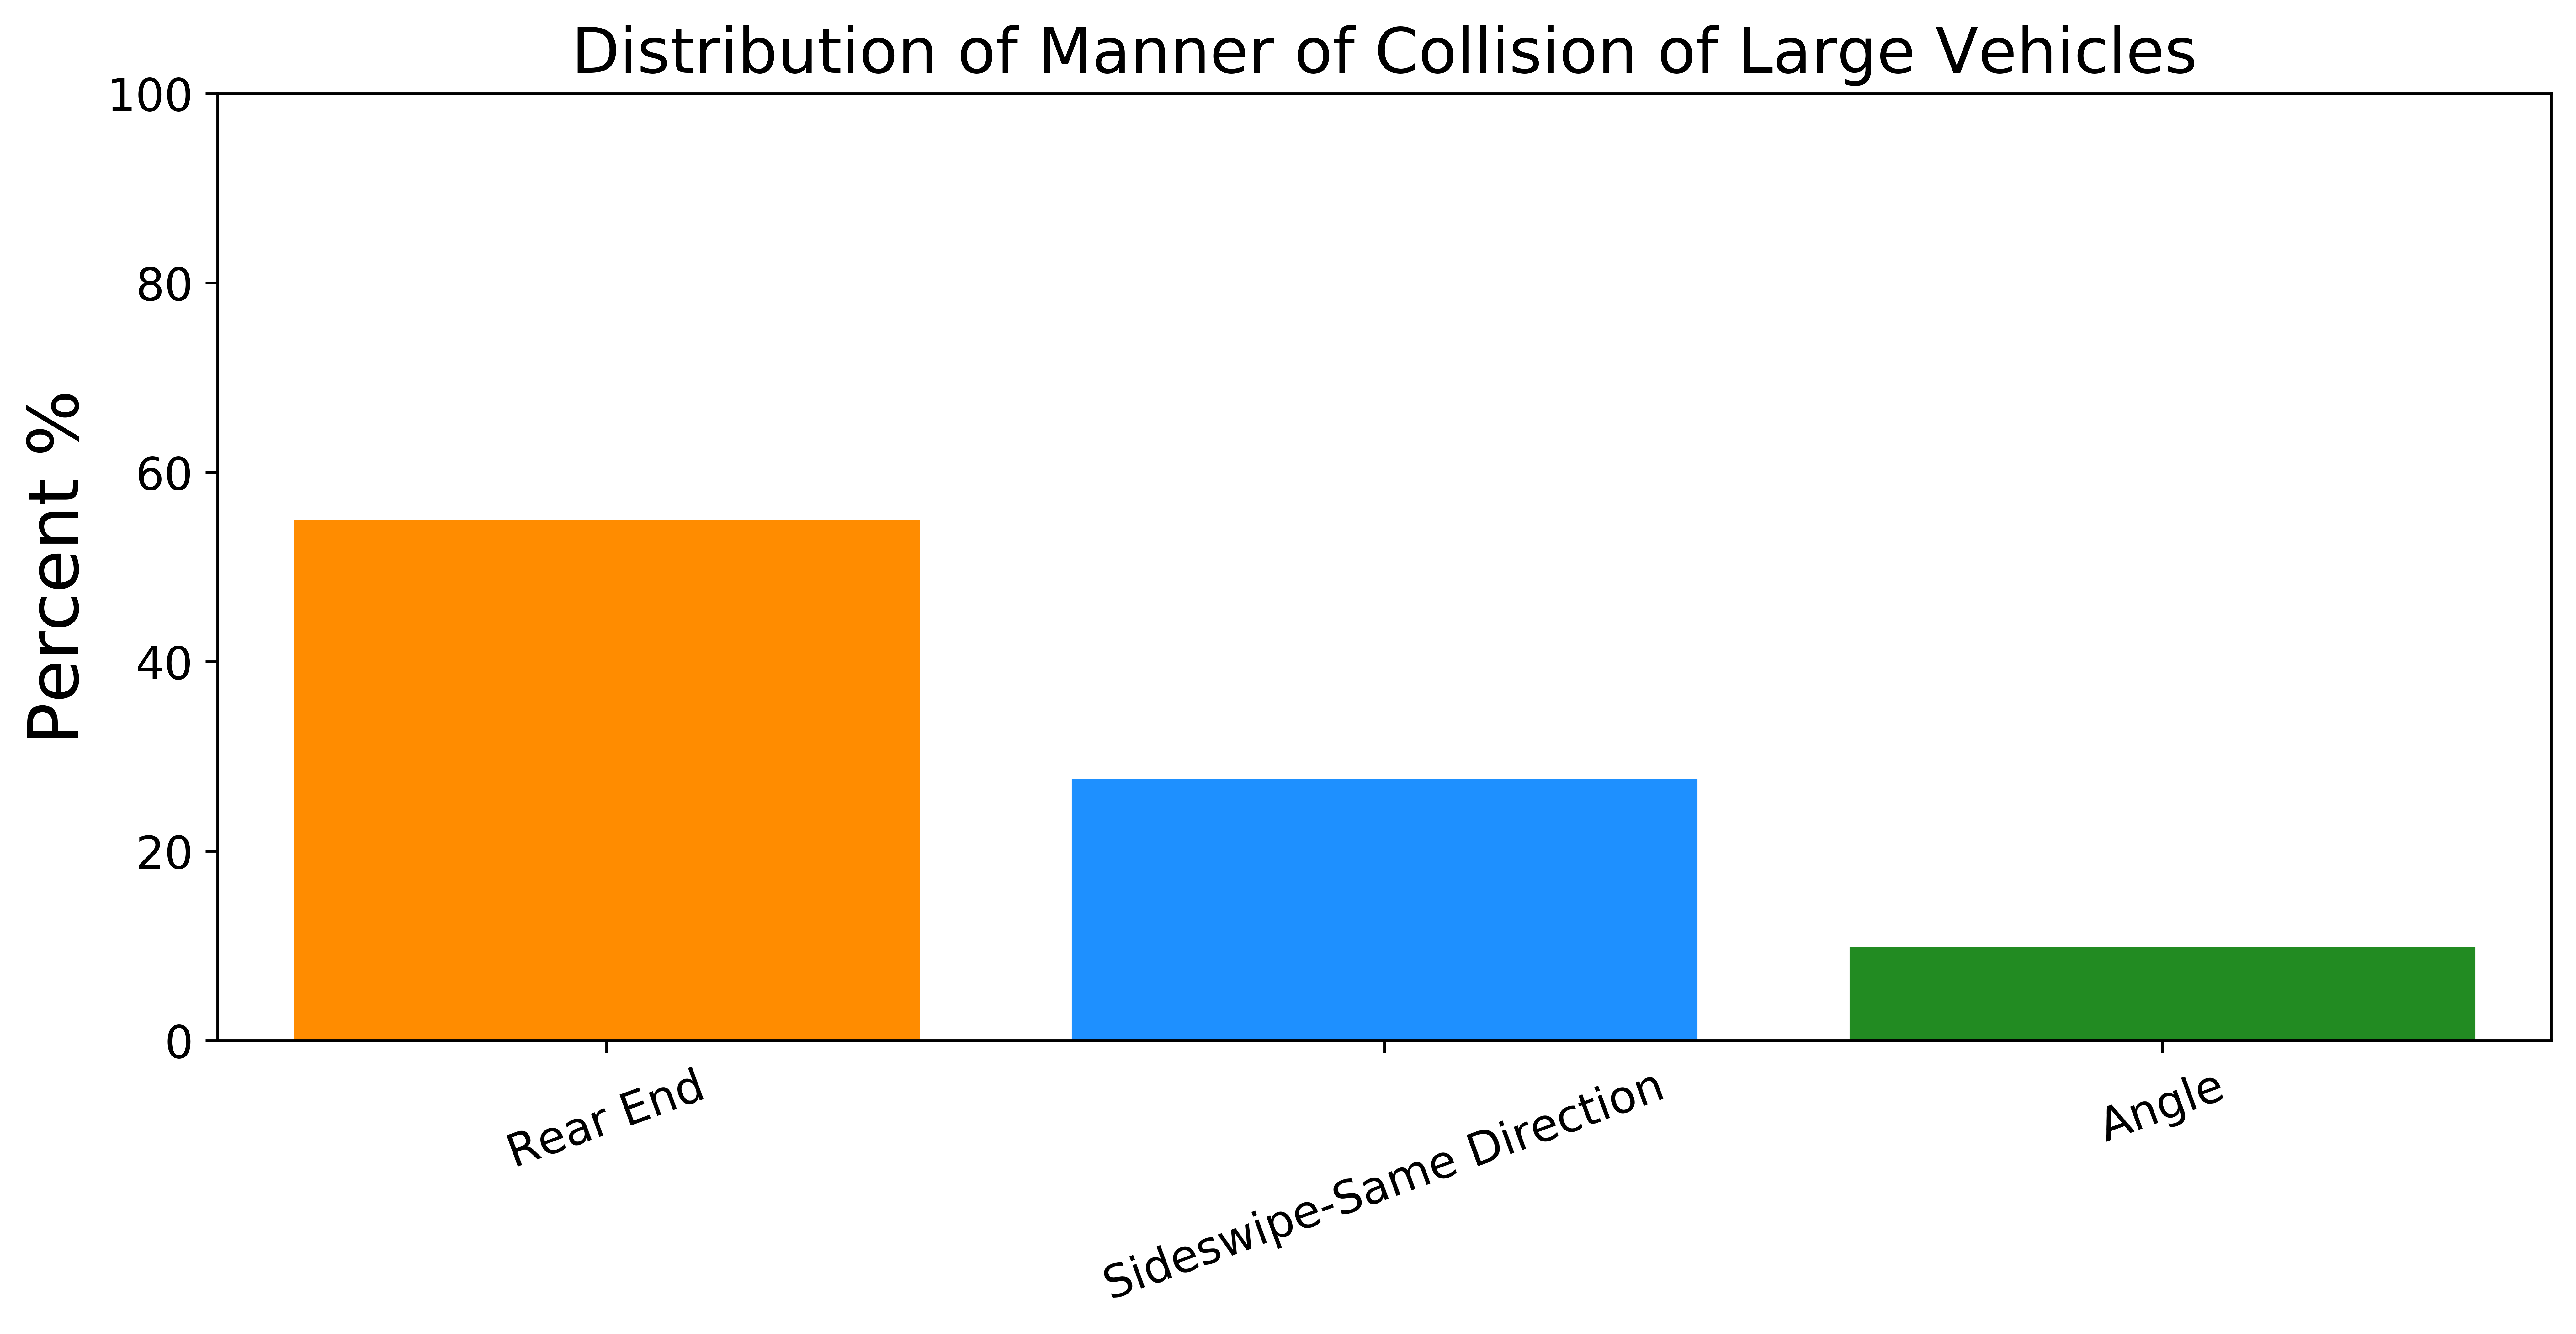

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = df['MannerOfCo'].value_counts().index.tolist()
orderCr = [1,2,3]

fig, ax = plt.subplots(1, 1, figsize=(12,5))
sns.barplot(data=df, x='MannerOfCo', y='MannerOfCo', saturation=1, order=orderCr, estimator=lambda x: len(x)/len(df)*100, ax=ax,)
ax.tick_params(labelsize=13)
ax.axes.set_title('Distribution of Manner of Collision of Large Vehicles',fontsize=18)
ax.set_xlabel("",fontsize=20)
ax.set_ylabel('Percent %',fontsize=20)
ax.set_xticklabels(['Rear End','Sideswipe-Same Direction','Angle','Not A Collision with Motor Vehicle'], rotation = 20)
# ax.set_xticklabels([convert[labels[0]],convert[labels[1]],convert[labels[2]],convert[labels[3]]], rotation = 20)
ax.axes.set_ylim(0,100)
colors = ['darkorange','dodgerblue', 'forestgreen', 'red']
for bar, color in zip(ax.patches, colors):
    print(bar)
    print(color)
    bar.set_color(color)

# T-minus data - Selecting data 5 mins before crash occurrence

In [223]:
from CKMDateTime import *
import sqlite3
from sqlalchemy import create_engine

LookUpDB = create_engine('sqlite:///H:\\CrashWeatherData\\DataBase\\csv_databaseTimeNmins052920.db', encoding='latin1')

# --- float to int --- #
df['Date1'] = df['Date1'].map(lambda x: int(x))
df['Time1'] = df['Time1'].map(lambda x: int(x))
df['camera'] = df['camera'].map(lambda x: int(x))
ds = DateTime2List(df)
test = df.copy()
test = test.drop(['Wind_Speed', 'Gust', 'Precip_Rate', 'Precip_Accum', 'Speed',
       'Road_Occupancy','Weekday', 'Ramp_Section',
       'MannerOfCo', 'Road_Curvature', 'Interchange_Within',
       'Interchange_Other', 'Interchange_Diverging', 'Interchange_Merging',
       'RoadComp_Black_Top', 'RoadComp_Concrete', 'RoadComp_Other',
       'Lighting_Daylight', 'Lighting_DarkLighted', 'Lighting_DarkNot_Lighted',
       'Lighting_Dusk', 'Lighting_Dawn', 'Lighting_Other', 'Surface_Dry',
       'Surface_Wet', 'Surface_Snow', 'Surface_Water', 'Surface_Other',
       'WorkZone', 'Veh_Count'], 1)

In [224]:
occ = []
vehc = []
speed = []
dropper = []
i = 0
for row in test.iterrows():
    try:
        Camid = row[1][0]
        time = row[1][3]
        lookupT = time - 5
        lookupTT = lookupT - 10
        dfLookUp = pd.read_sql_query('SELECT * FROM data_use WHERE Time < '+ str(lookupT) + ' and Time > '+ str(lookupTT) + ' and id = ' + str(Camid) , LookUpDB)
        dfLookUp.iloc[-1,:]
        speed.append(dfLookUp.iloc[-1,:][4]) #speed
        occ.append(dfLookUp.iloc[-1,:][5]) # occupancy
        vehc.append(dfLookUp.iloc[-1,:][6]) # vehCount
    
    except IndexError:
        dropper.append(row[0]) 
        
    i += 1
    print(i)

In [232]:
df['Lighting_Dusk_Dawn'] = df['Lighting_Dusk'] + df['Lighting_Dawn']
df = df.drop(['Lighting_Dusk','Lighting_Dawn', 'Lighting_Other', 'Lighting_Daylight','Interchange_Other', 'RoadComp_Concrete',
              'Surface_Dry'], 1)

In [234]:
df = df[df['MannerOfCo'] != 4 ]

## Exploring clustering for outliers

In [236]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

In [237]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
rcParams['axes.labelsize'] = "large"
rcParams['font.size']= 20

from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import scipy.cluster.hierarchy as sch

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
    
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes


def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    
    
    CC = get_cluster_classes(B)
    return CC
def give_cluster_assigns(df, numclust, transpose = True):
#     if transpose==True:
#         data_dist = pdist(df.transpose())
#         data_link = linkage(data_dist,  metric='correlation', method='complete')
#         cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.columns)
#     else:
    data_dist = pdist(df)
    data_link = linkage(data_dist,  metric='correlation', method='complete')
    cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.index)
    cluster_diction = {}
    for i in np.arange(1,numclust+1):
        cluster_diction[str(i)] = cluster_assigns[cluster_assigns==i].index.tolist()
        
        
    return cluster_assigns, cluster_diction        
#         print("Cluster ",str(i),": ( N =",len(cluster_assigns[cluster_assigns==i].index),")", ", ".join(list(cluster_assigns[cluster_assigns==i].index)))

In [238]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

b,"['(55)', '(3657)']"


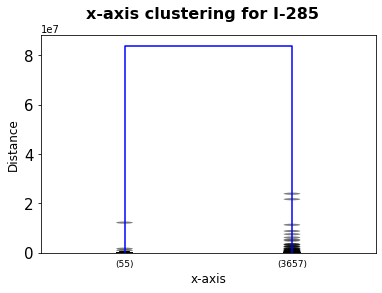

In [263]:
%matplotlib inline
n_clusters = 2
get_clust_graph(poolFixed, n_clusters, transpose=True,dataname="I-285", save="ww2", xticksize=9)

In [264]:
# Get a dictionary of index's in each cluster
cluster_assigns, cluster_diction = give_cluster_assigns(poolFixed, n_clusters, transpose = True)

## For removing outliers 

In [267]:
for Cluster in [*cluster_diction]:
    print(len(cluster_diction[str(Cluster)]))
# --- Fixed Pool Update --- #
selected = cluster_diction['2']
poolFixed = df[df.index.isin(selected)]
poolFixed.shape

55
3657


(3657, 24)

In [268]:
def unique_cols2(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    lister = (a[0] == a[1:]).all(0)
    d = {'Column':df.columns.tolist(), 'Sing':lister.tolist()}
    ddf = pd.DataFrame.from_dict(d)
    ddf = ddf[ddf['Sing'] == True]
    remover = ddf['Column'].tolist()
    df = df.drop(remover, 1)
    return df
df = unique_cols2(df)
# poolFixed = unique_cols2(poolFixed)

In [269]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a[1:]).all(0)


In [270]:
totalpooled = []
for Cluster in [*cluster_diction]:
    selected = cluster_diction[Cluster]
    totalpooled = totalpooled + selected
len(totalpooled)

3712

In [271]:
poolFixed = df[df.index.isin(totalpooled)]

In [272]:
poolFixed.shape

(3712, 23)

In [273]:
df.shape

(3726, 23)

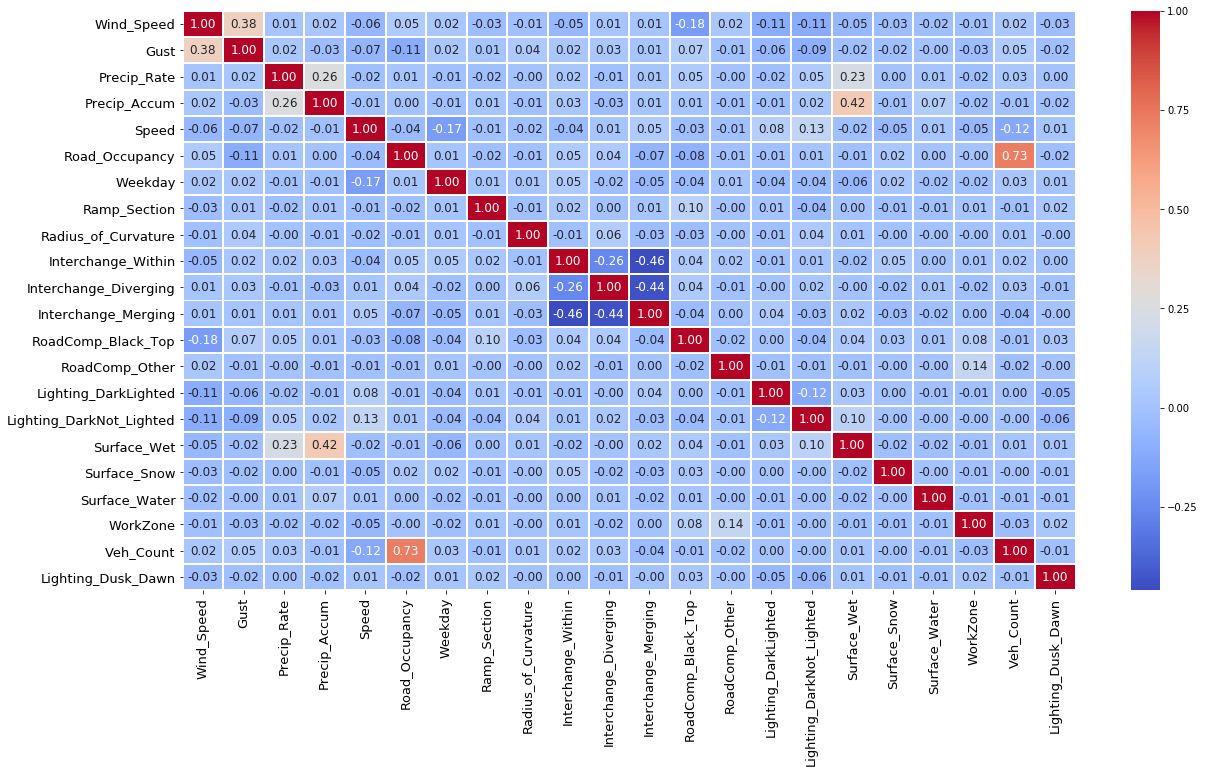

In [275]:
# --- Correlation Matrix Heatmap --- #
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
f, ax = plt.subplots(figsize=(20, 10))
corr = df.drop(['MannerOfCo'], 1).corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=1, annot_kws={"size": 12})
f.subplots_adjust(top=0.93)
hm.tick_params(labelsize=13)
# t= f.suptitle('Crash Attributes Correlation Heatmap', fontsize=20)

# Remove outliers by z score then LDA

In [276]:
new_df = df[df.index.isin(totalpooled)]
new_df = new_df[new_df['MannerOfCo'] != 0 ]

labels = df.columns.tolist()
labels.remove('MannerOfCo')
X = new_df.drop(['MannerOfCo'], 1).to_numpy()
y = new_df['MannerOfCo'].to_numpy()
ydf = new_df['MannerOfCo']
#scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
x_new = lda.transform(X)   

0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
1.5
0.15
0.15
0.15
0.15
################################# MAX For LD1 #################################
                      Labels        dx        dy
4                      Speed  0.736874  0.015371
20                 Veh_Count  0.342179  0.179644
14      Lighting_DarkLighted  0.335185  0.246298
15  Lighting_DarkNot_Lighted  0.301603  0.009793
9         Interchange_Within  0.299145  0.046523
5             Road_Occupancy  0.233052  0.013893
0                 Wind_Speed  0.157267  0.214072
16               Surface_Wet  0.129022  0.336751
3               Precip_Accum  0.127723  0.121247
12        RoadComp_Black_Top  0.110196  0.357599
7               Ramp_Section  0.105085  0.065620
19                  WorkZone  0.104766  0.023162
1                       Gust  0.085174  0.406728
2                Precip_Rate  0.074167  0.109454
18             Surface_Water  0.040256  0.013089
10     Interchange_Diverging  0.031041  0.106203
17              Surface

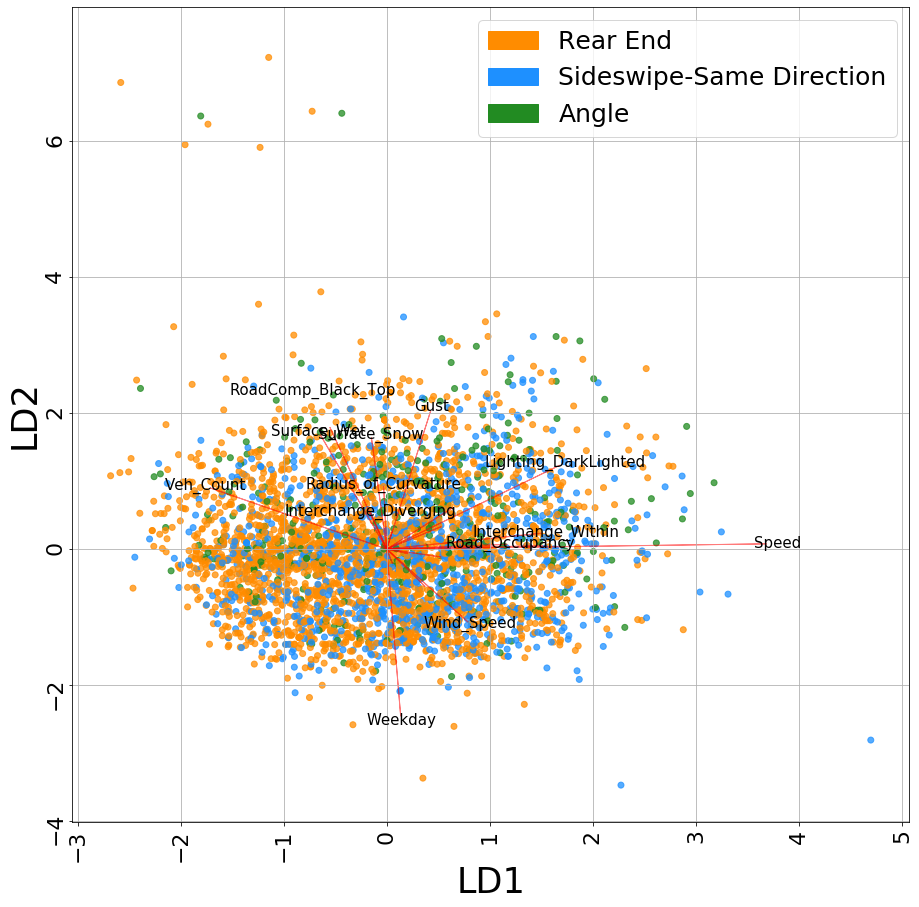

In [277]:
import matplotlib.patches as mpatches
colors = ['darkorange','dodgerblue', 'forestgreen', 'red']

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

def myplot(score,coeff,labels, y):
    %matplotlib inline 
    plt.rcParams['figure.figsize'] = [15, 15]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y = y.replace({0: 'black', 1: 'darkorange', 2:'dodgerblue', 3: 'forestgreen', 4: 'purple', 5: 'magenta', 6: 'blue'})
 

    plt.scatter(xs ,ys, c = y, alpha = 0.75) #without scaling
    
    dy = []
    dx = []
    l = []
    for i in range(n):
        pass
        m = 5
        plt.arrow(0, 0, coeff[i,0]*m, coeff[i,1]*m,color = 'r',alpha = 0.5)
        dx.append(coeff[i,0])
        dy.append(coeff[i,1])
        l.append(labels[i])
        
        if labels[i] in ['Precip_Rate','Precip_Accum','Lighting_DarkNot_Lighted','WorkZone',
                        'RoadComp_Other','WorkZone','Ramp_Section','Interchange_Merging',
                        'Lighting_Dusk_Dawn','Surface_Water']:
            pass
        
        else:
            if labels[i] in ['RoadComp_Black_Top', 'Road_Curvature']:
                p = 1.5
            else:
                p=0.15
            print(p)
            if labels is None:
                plt.text(coeff[i,0]* (m+p), coeff[i,1] * (m+p), "Var"+str(i+1), color = 'black',
                         ha = 'center', va = 'center', fontsize=15)
            else:
                plt.text(coeff[i,0]* (m+p), coeff[i,1] * (m+p), labels[i], color = 'black',
                         ha = 'center', va = 'center', fontsize=15)

    d = {'Labels': l, 'dx': dx,'dy': dy}
    arrow = pd.DataFrame(data=d)
    arrow.dx = arrow.dx.abs()
    arrow.dy = arrow.dy.abs()
    LD1 = arrow.sort_values(by='dx', ascending=False)
    LD2 = arrow.sort_values(by='dy', ascending=False)
    print('################################# MAX For LD1 #################################')
    print(LD1.head(25))
    print('\n\n################################# MAX For LD2 #################################')
    print(LD2.head(25))
    
    return arrow, LD1, LD2
 

#Call the function. 
arrow, LD1, LD2 = myplot(x_new[:,0:6], lda.scalings_, labels, ydf)
plt.xlabel("LD{}".format(1), fontsize=35)
plt.ylabel("LD{}".format(2), fontsize=35)
plt.grid()
red_patch = mpatches.Patch(color=colors[0], label='Rear End')
cyan_patch = mpatches.Patch(color=colors[1], label='Sideswipe-Same Direction')
lime_patch = mpatches.Patch(color=colors[2], label='Angle')
plt.legend(handles=[red_patch, cyan_patch, lime_patch], fontsize=25)
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22, rotation=90)
plt.show()

# {'Rear End': 1, 'Sideswipe-Same Direction': 2, 'Angle': 3,'Not A Collision with Motor Vehicle': 4,
# 'Head On': 5, 0:0, 'Sideswipe-Opposite Direction': 6, '0': 0}

0.15
0.15
-0.3
0.15
0.15
0.15
0.15
0.15
1.5
0.15
0.15
-0.19
0.15
################################# MAX For LD1 #################################
                      Labels        dx        dy
4                      Speed  0.736874  0.015371
20                 Veh_Count  0.342179  0.179644
14      Lighting_DarkLighted  0.335185  0.246298
15  Lighting_DarkNot_Lighted  0.301603  0.009793
9         Interchange_Within  0.299145  0.046523
5             Road_Occupancy  0.233052  0.013893
0                 Wind_Speed  0.157267  0.214072
16               Surface_Wet  0.129022  0.336751
3               Precip_Accum  0.127723  0.121247
12        RoadComp_Black_Top  0.110196  0.357599
7               Ramp_Section  0.105085  0.065620
19                  WorkZone  0.104766  0.023162
1                       Gust  0.085174  0.406728
2                Precip_Rate  0.074167  0.109454
18             Surface_Water  0.040256  0.013089
10     Interchange_Diverging  0.031041  0.106203
17              Surfac

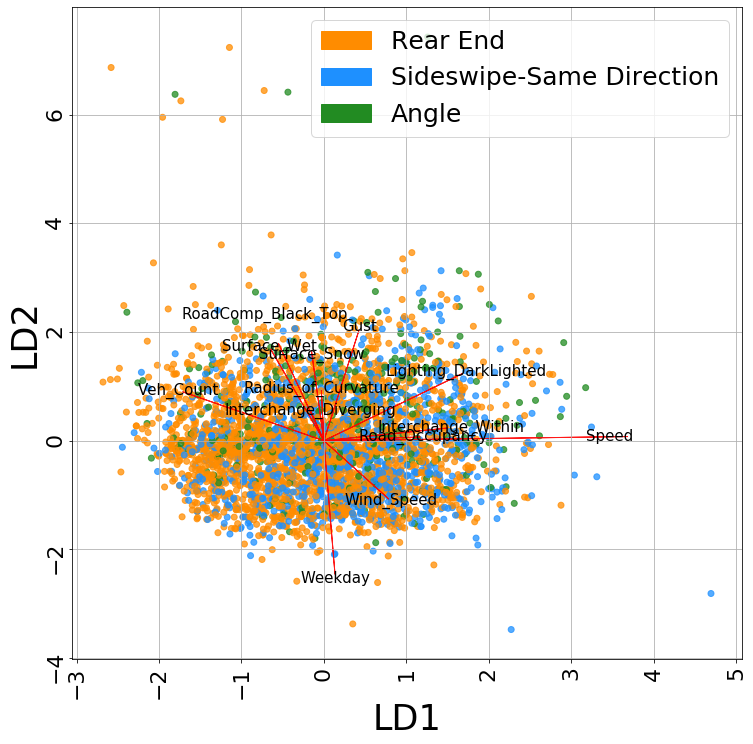

In [278]:
import matplotlib.patches as mpatches
colors = ['darkorange' ,'dodgerblue','forestgreen']

import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
plt.rcParams['figure.figsize'] = [12, 12]

def myplot(score,coeff,labels, y):
    %matplotlib inline 
    plt.rcParams['figure.figsize'] = [12, 12]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y = y.replace({0: 'black', 1: 'darkorange', 2:'dodgerblue', 3: 'forestgreen', 4: 'purple', 5: 'magenta', 6: 'blue'})
 

    plt.scatter(xs ,ys, c = y, alpha = 0.75) #without scaling
    
    dy = []
    dx = []
    l = []
    for i in range(n):
        pass
        m = 5
        dx.append(coeff[i,0])
        dy.append(coeff[i,1])
        l.append(labels[i])
        
        if labels[i] in ['Precip_Rate','Precip_Accum','Lighting_DarkNot_Lighted','WorkZone',
                        'RoadComp_Other','WorkZone','Ramp_Section','Interchange_Merging',
                        'Lighting_Dusk_Dawn','Surface_Water']:
            pass
        
        else:
            plt.arrow(0, 0, coeff[i,0]*m, coeff[i,1]*m,color = 'r',alpha = 0.9)
            if labels[i] in ['RoadComp_Black_Top', 'Road_Curvature']:
                p = 1.5
            elif labels[i] in ['Surface_Snow']:
                p = -0.19
            elif labels[i] in ['Speed']:
                p = -0.3
            else:
                p=0.15
            print(p)
            if labels is None:
                plt.text(coeff[i,0]* (m+p), coeff[i,1] * (m+p), "Var"+str(i+1), color = 'black',
                         ha = 'center', va = 'center', fontsize=15)
            else:
                plt.text(coeff[i,0]* (m+p), coeff[i,1] * (m+p), labels[i], color = 'black',
                         ha = 'center', va = 'center', fontsize=15)

    d = {'Labels': l, 'dx': dx,'dy': dy}
    arrow = pd.DataFrame(data=d)
    arrow.dx = arrow.dx.abs()
    arrow.dy = arrow.dy.abs()
    LD1 = arrow.sort_values(by='dx', ascending=False)
    LD2 = arrow.sort_values(by='dy', ascending=False)
    print('################################# MAX For LD1 #################################')
    print(LD1.head(25))
    print('\n\n################################# MAX For LD2 #################################')
    print(LD2.head(25))
    
    return arrow, LD1, LD2
 

#Call the function. 
arrow, LD1, LD2 = myplot(x_new[:,0:6], lda.scalings_, labels, ydf)
plt.xlabel("LD{}".format(1), fontsize=35)
plt.ylabel("LD{}".format(2), fontsize=35)
plt.grid()
red_patch = mpatches.Patch(color=colors[0], label='Rear End')
cyan_patch = mpatches.Patch(color=colors[1], label='Sideswipe-Same Direction')
lime_patch = mpatches.Patch(color=colors[2], label='Angle')
plt.legend(handles=[red_patch, cyan_patch, lime_patch], fontsize=25)
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=22, rotation=90)
plt.show()

# XGBoost and SHAP

In [281]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.metrics import precision_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

labels = df.columns.tolist()
labels.remove('MannerOfCo')
new_df = df[df.index.isin(totalpooled)]
new_df = new_df[new_df['MannerOfCo'] != 0 ]
X = new_df.drop(['MannerOfCo'], 1)

########## Select Standard Scaler ###########
scaled_features = X.copy()

col_names = [ 'Wind_Speed', 'Gust',
             'Precip_Rate', 'Precip_Accum', 'Speed','Road_Occupancy','Radius_of_Curvature','Veh_Count']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[col_names] = features

##############################################
Xdf = X
X = X
y = new_df['MannerOfCo']

# Must start at 0
y = y - 1

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=labels)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=labels)
dtrain, dtest

(<xgboost.core.DMatrix at 0x27cb4331f28>,
 <xgboost.core.DMatrix at 0x27cb4331f60>)

In [ ]:
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

def fast_boost(X_train, y_train, X_test, y_test):
    
    from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
    
    space = {
        'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
        'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
        'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
        'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
        'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

    from sklearn.model_selection import train_test_split

    def objective(space):
        
        classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                                max_depth = int(space['max_depth']),
                                learning_rate = space['learning_rate'],
                                gamma = space['gamma'],
                                min_child_weight = space['min_child_weight'],
                                subsample = space['subsample'],
                                colsample_bytree = space['colsample_bytree']
                                )

        classifier.fit(X_train, y_train)

        # Applying k-Fold Cross Validation
        from sklearn.model_selection import cross_val_score
        accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 4)
        CrossValMean = accuracies.mean()
        CrossValVar = accuracies.var()
        
        print("CrossValMean:", CrossValMean)
        print("CrossValVar:", CrossValVar)

        return{'loss':1-CrossValMean, 'status': STATUS_OK }


    ###################################################
    trials = Trials()
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials)

    print("Best: ", best)
    ###################################################

    from xgboost import XGBClassifier
    XGBmodel = XGBClassifier(n_estimators = best['n_estimators'],
                                max_depth = best['max_depth'],
                                learning_rate = best['learning_rate'],
                                gamma = best['gamma'],
                                min_child_weight = best['min_child_weight'],
                                subsample = best['subsample'],
                                colsample_bytree = best['colsample_bytree']
                                )

    XGBmodel.fit(X_train, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = XGBmodel, X = X_train, y = y_train, cv = 4)
    CrossValMean = accuracies.mean()
    print("Final CrossValMean: ", CrossValMean)

    CrossValSTD = accuracies.std()
    y_pred = XGBmodel.predict(X_test)
    
    draw_cm(y_test, y_pred)
    acc_nb = round(metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    print('Total Accuracy: ', acc_nb )
    

    
    return XGBmodel

In [ ]:
XGBmodel = fast_boost(X_train, y_train, X_test, y_test)

In [1]:
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800

import shap
import matplotlib.pyplot as pl
names = {1:'Rear End', 2:'Sideswipe-Same Direction', 3:'Angle',4:'Not A Collision with Motor Vehicle'}

y = new_df['MannerOfCo']
labelx = ['Rear End','Sideswipe-Same Direction','Angle']
X_train, X_test, y_train, y_test = train_test_split(Xdf, y, test_size=0.3, random_state=0)
plt.rcParams['figure.figsize'] = [15, 5]


from matplotlib import colors as plt_colors
classes = ['r', 'g', 'b']
# set RGB tuple per class
colors = [(255/255,140/255,0), (30/255,144/255,255/255), (34/255,139/255,34/255)]
# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])
# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])


explainer = shap.TreeExplainer(XGBmodel)
shap_values = explainer.shap_values(X_test,approximate=True)
ss = shap.summary_plot(shap_values, X_test, plot_type="bar", color=cmap, class_names=labelx)

for class_num in range(len(shap_values)):
    print('############################################ Class ' + str(names[class_num + 1]) + ' ############################################')
    shap.summary_plot(shap_values[class_num], X_test)

## All code below was unused for this research.
## Simple exploration of stepwise gridsearch that proved to be more proficient
## than gridsearch but not as effective as the final method chosen.

# ---------------------------------------------------------------------------

# PAIRWISE METHOD

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.metrics import precision_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

labels = df.columns.tolist()
labels.remove('MannerOfCo')
new_df = df[df.index.isin(totalpooled)]
new_df = new_df[new_df['MannerOfCo'] != 0 ]
X = new_df.drop(['MannerOfCo'], 1)

########## Select Standard Scaler ###########
scaled_features = X.copy()

col_names = [ 'Wind_Speed', 'Gust',
             'Precip_Rate', 'Precip_Accum', 'Speed','Occupancy','Curva']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[col_names] = features

##############################################
Xdf = X
X = X.to_numpy()
y = new_df['MannerOfCo'].to_numpy()

# Must start at 0
y = y - 1

X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.4)

In [ ]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4,5,6,7,8,9,10,11]}    # parameters to be tries in the grid search


fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective':'multi:softprob','num_class' : 3}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5)
csv.fit(X_, y_)

In [ ]:
csv.best_params_

In [ ]:
cv_params = {'subsample': [0.4,0.6,0.8,0.9,1], 'max_delta_step': [0,1,2,4,5,6,7,8]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective':'multi:softprob', 'max_depth': 1, 'min_child_weight':3}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
cv_params = {'subsample': [0.7,0.75,0.77,0.8,0.825,0.85,0.9,1], 'max_delta_step': [0,0.05,0.1,0.15,0.2,0.3,0.35,0.37,0.4,0.5,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective':'multi:softprob', 'max_depth': 1, 'min_child_weight':3}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
cv_params = {'subsample': [(i/100.0) + .6 for i in range(1,40)], 'max_delta_step': [(i/50.0) + 0 for i in range(1,50)]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective':'multi:softprob', 'max_depth': 1, 'min_child_weight':3}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
fix_params = {'learning_rate': 0.2, 'n_estimators': 140, 'objective':'multi:softprob', 'max_depth': 2,
              'min_child_weight':3, 'max_delta_step': 0.26, 'subsample':0.81}
cv_params = {'learning_rate': [(i/50.0) + 0 for i in range(1,100)]}
fix_params['max_delta_step'] = 0.26
fix_params['subsample'] = 0.81
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
fix_params['learning_rate'] = 0.06
params_final =  fix_params
print(params_final)

In [ ]:
cv_params = {'colsample_bytree':[i/100.0 for i in range(1,100)]}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
fix_params['colsample_bytree'] = 0.25
cv_params = {'gamma':[i/100.0 for i in range(0,100)]}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
fix_params['gamma'] = 0.1
cv_params = {'reg_alpha':[i/100.0 + 1 for i in range(0,100)]}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = "neg_log_loss", cv = 5) 
csv.fit(X_, y_)
csv.best_params_

In [ ]:
fix_params['scale_pos_weight'] = 1